# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

The most obvious observation is that Capomulin is the most effective tumor drug. 
Mouse weight and the average tumor volume are closely correlated. Higher weight of the subject results in larger tumor volume. 
Infubinol is the only drug out of the top four promising regimen whose data might be skewed by an outlier. 


In [255]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [48]:
# Checking the number of mice.
num_of_mice = merged_data['Mouse ID'].nunique()
num_of_mice

249

In [49]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data.loc[merged_data["Mouse ID"].isin(duplicates)]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_data = merged_data[merged_data['Mouse ID'].isin(duplicates)==False]
clean_merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [52]:
# Checking the number of mice in the clean DataFrame.
#clean_num_of_mice = clean_merged_data['Mouse ID'].nunique()
#clean_num_of_mice
len(clean_merged_data["Mouse ID"].unique())

248

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats_gb = clean_merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

summary_stats_dict = {
    'Mean Tumor Volume': summary_stats_gb.mean(),
    'Median Tumor Volume': summary_stats_gb.median(),
    'Variance Tumor Volume': summary_stats_gb.var(),
    'Standard Deviation Tumor Volume': summary_stats_gb.std(),
    'SEM Tumor Volume': summary_stats_gb.sem(),
}
pd.DataFrame(summary_stats_dict)

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_merged_data.groupby('Drug Regimen').agg(
    {
        'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem'],
    }     
).reset_index()

summary_stats

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [73]:
clean_merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


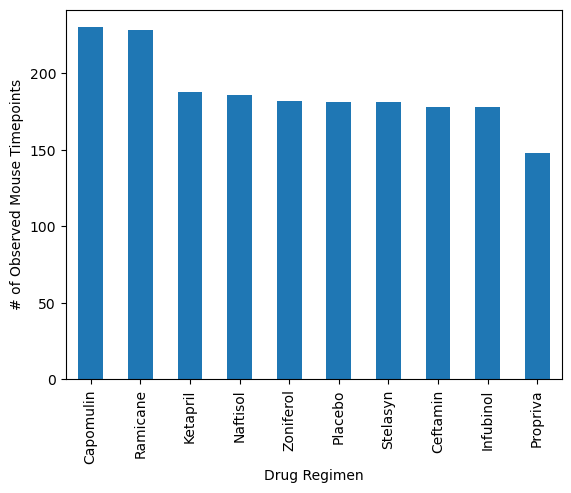

In [139]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_counts_by_drug_series = clean_merged_data.groupby('Drug Regimen').count()['Timepoint']
row_counts_by_drug_series.sort_values(ascending=False).plot(kind='bar')
#row_counts_by_drug_series.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()
#row_counts_by_drug_series


In [143]:
top_four = row_counts_by_drug_series.head(4)
top_four


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Name: Timepoint, dtype: int64

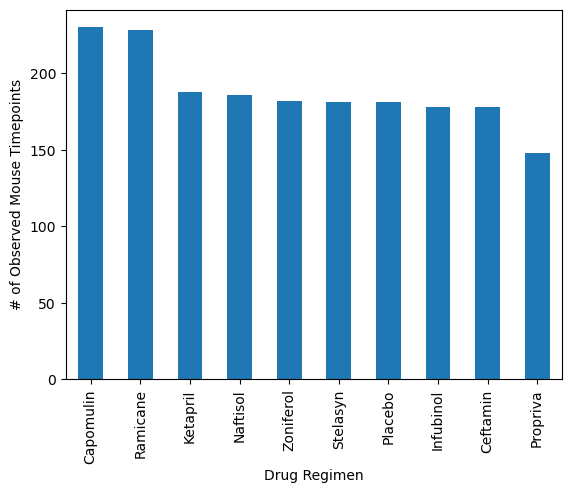

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# DO NOT RUN

In [81]:
row_counts_by_drug_series.values

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

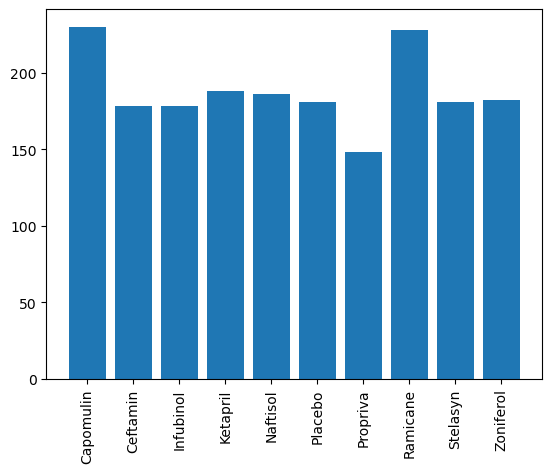

In [192]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(row_counts_by_drug_series.index, row_counts_by_drug_series.values)
plt.xticks(rotation='vertical')
plt.show

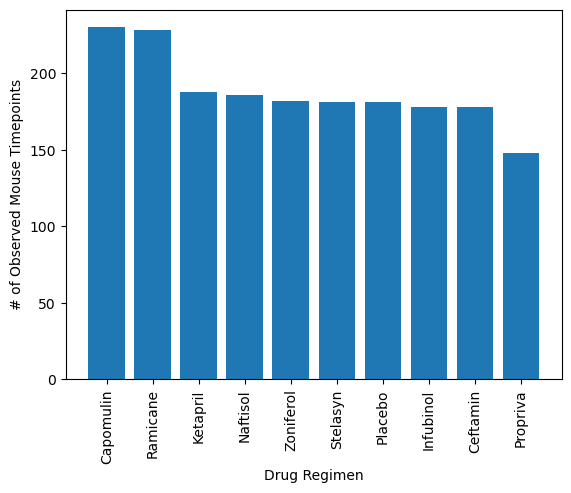

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# DO NOT RUN

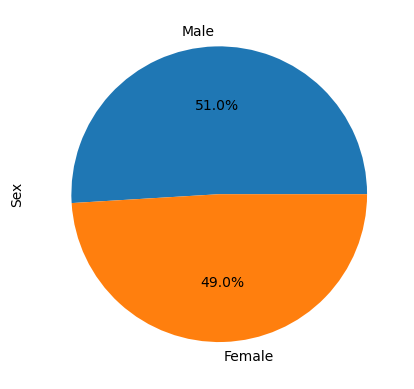

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# DO NOT RUN

Text(-1.5, 0, 'Sex')

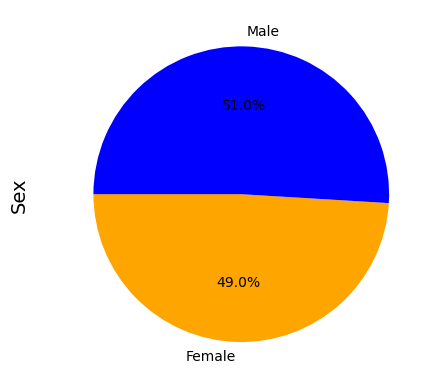

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
row_counts_by_sex_series = clean_merged_data.groupby('Sex').size()
custom_colors = ['orange', 'blue']
row_counts_by_sex_series.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=custom_colors)
plt.text(-1.5, 0, "Sex", rotation=90, va='center', ha='center', fontsize=14)

#plt.pie(row_counts_by_sex_series.index, row_counts_by_drug_series.values)

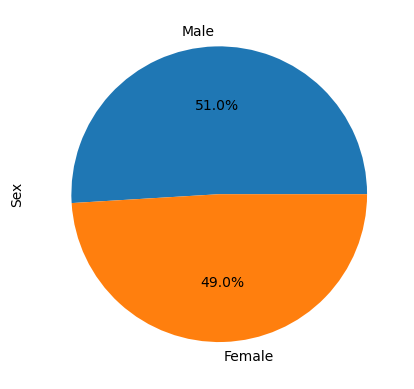

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# DO NOT RUN


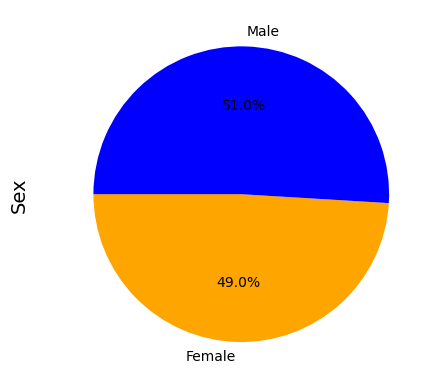

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
row_counts_by_sex_series = clean_merged_data.groupby('Sex').size()
custom_colors = ['orange', 'blue']
plt.pie(row_counts_by_sex_series, labels=row_counts_by_sex_series.index, autopct='%1.1f%%', startangle=180, colors=custom_colors)
plt.text(-1.5, 0, "Sex", rotation=90, va='center', ha='center', fontsize=14)
plt.show()

## Quartiles, Outliers and Boxplots

In [198]:
# Calculate the final tumor volume of each mouse across the four most promising treatment regimens.
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_merged_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
#print(last_timepoint)

promising_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
promising_regimens_data = clean_merged_data[clean_merged_data['Drug Regimen'].isin(promising_regimens)]
#print(promising_regimens_data)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = last_timepoint.merge(clean_merged_data, on=['Mouse ID', 'Timepoint'])
print(final_tumor_volume)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20  

In [14]:
# DO NOT RUN 
# Put treatments into a list for for loop (and later for plot labels) # Capomulin, Ramicane, Infubinol, and Ceftamin

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
# For each promising treatment
    
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series

    
    # add the tumor volume series to tumor_volumes 
    
    # Determine outliers within this drug using using IQR upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [199]:
# Put treatments into a list for for loop (and later for plot labels) # Capomulin, Ramicane, Infubinol, and Ceftamin
promising_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_list = []
# For each promising treatment
for regimen in promising_regimens:
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
        # add the tumor volume series to tumor_volumes 
    tumor_volumes_list.append(tumor_volumes)
    # Determine outliers within this drug using using IQR upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


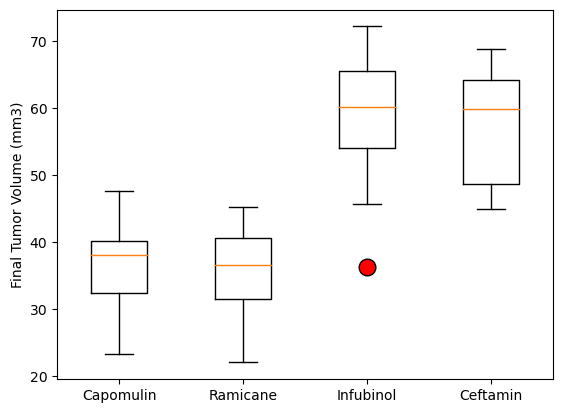

In [15]:
# DO NOT RUN
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


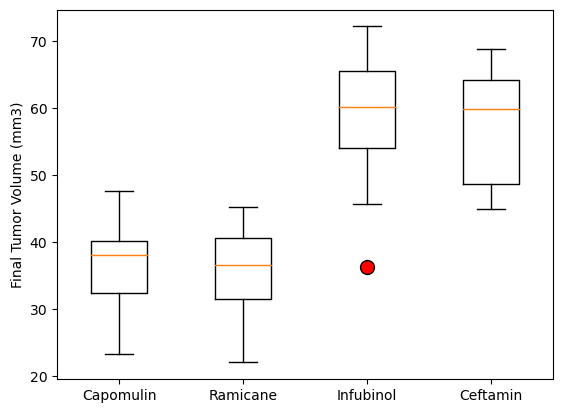

In [203]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes_list, labels=promising_regimens, flierprops=dict(marker='o', markersize=10, markerfacecolor='red'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

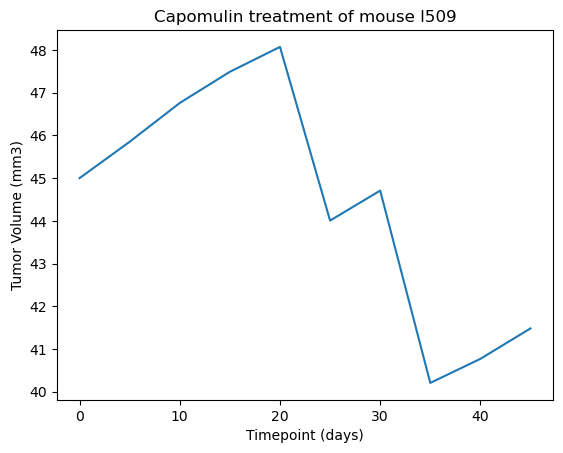

In [16]:
# DO NOT RUN
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


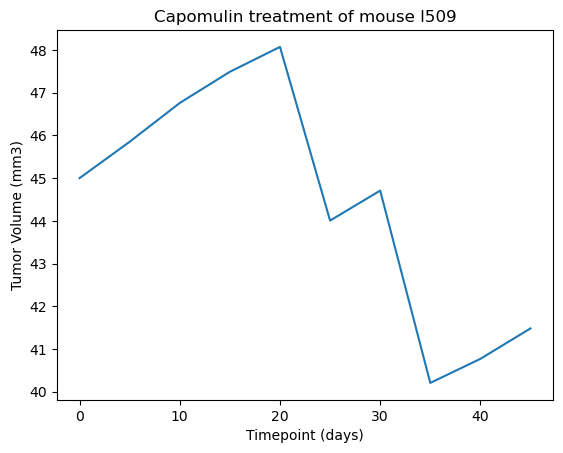

In [218]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
ind_mouse_id ='l509'
capomulin_table = clean_merged_data.loc[clean_merged_data['Drug Regimen'] == 'Capomulin']
capomulin_ind_mouse = capomulin_table.loc[capomulin_table['Mouse ID'] == (ind_mouse_id)]
if not capomulin_ind_mouse.empty:
    plt.plot(capomulin_ind_mouse['Timepoint'], capomulin_ind_mouse['Tumor Volume (mm3)'])
    plt.title(f'Capomulin treatment of mouse {ind_mouse_id}')
    plt.xlabel('Timepoint (days)')
    plt.ylabel('Tumor Volume (mm3)')
    plt.show()
else:
    print(f'{ind_mouse_id} not treated with Capomulin')

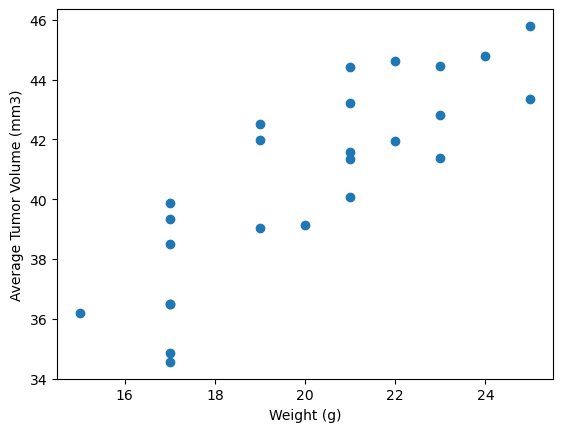

In [17]:
# DO NOT RUN
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


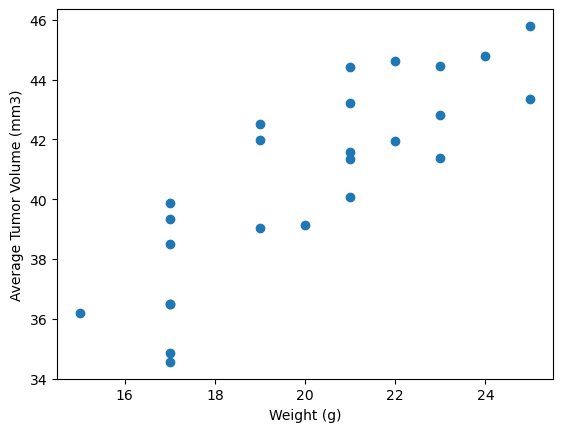

In [250]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_table.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_table.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
#print(avg_tumor_volume)
#print(mouse_weight)


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


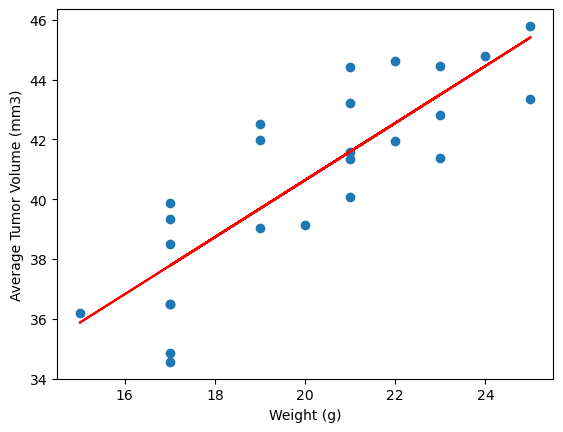

In [18]:
# DO NOT RUN
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and the average tumor volume is 0.84


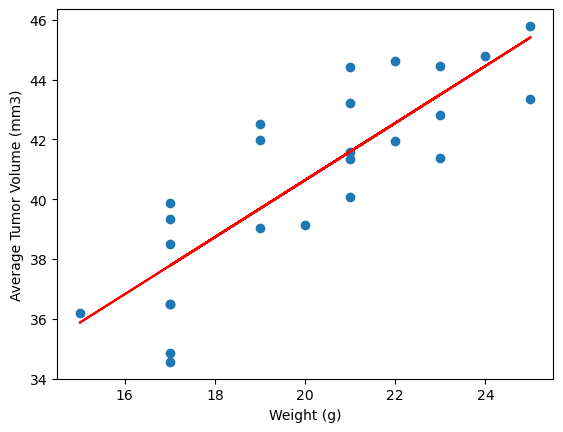

In [256]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_volume)
regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight,regress_values,"r-")
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.show()